In [1]:
import pandas as pd
import json
import requests
import os
import re

# Import csv

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Import image predictions

In [12]:
#Read tsv
image_pred = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_pred.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

# Tweet JSON

In [14]:
#Make pd df from empty dict
tweet_dict = {
    'tweet_id':[],
    'retweets':[],
    'faves':[],
    'full_text':[]
}

In [15]:
#open .txt
with open('tweet-json.txt','r') as file:
          for line in file:
              data = json.loads(line)
          #append values to dict
              tweet_dict['tweet_id'].append(data['id'])
              tweet_dict['retweets'].append(data['retweet_count'])
              tweet_dict['faves'].append(data['favorite_count'])
              tweet_dict['full_text'].append(data['full_text'])
tweet_dict     

{'tweet_id': [892420643555336193,
  892177421306343426,
  891815181378084864,
  891689557279858688,
  891327558926688256,
  891087950875897856,
  890971913173991426,
  890729181411237888,
  890609185150312448,
  890240255349198849,
  890006608113172480,
  889880896479866881,
  889665388333682689,
  889638837579907072,
  889531135344209921,
  889278841981685760,
  888917238123831296,
  888804989199671297,
  888554962724278272,
  888078434458587136,
  887705289381826560,
  887517139158093824,
  887473957103951883,
  887343217045368832,
  887101392804085760,
  886983233522544640,
  886736880519319552,
  886680336477933568,
  886366144734445568,
  886267009285017600,
  886258384151887873,
  886054160059072513,
  885984800019947520,
  885528943205470208,
  885518971528720385,
  885311592912609280,
  885167619883638784,
  884925521741709313,
  884876753390489601,
  884562892145688576,
  884441805382717440,
  884247878851493888,
  884162670584377345,
  883838122936631299,
  883482846933004288

In [16]:
tweet_dict_df = pd.DataFrame(tweet_dict)
tweet_dict_df.head()

,tweet_id,retweets,faves,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...


# Assessment
## 8 Quality, 3 tidiness

In [17]:
#Quality Issues
#1) Not all sources have same number of tweet IDs
#2) Some URLs are multiple
#3) Name comtains 'his' , none' etc
#4) Some records have incorrect scoring due to multiple 'n/n's in the text 
#5) Some records show more than 1 image but 1 url
#6) Some records with all probabilities of dog types 'FALSE'
#7) Categorisation of dogs too disparate
#8) Several columns are FLOAT

#Tidiness
#1) tweet_json and twitter_archive shouldn't be separate tables as describing same object
#2) Full_text and text, duplicate info
#3) doggo ,floofer, pupper and puppo are objects when could be boolean to save space

###  Quality Issues

In [18]:
#1) Not all sources have same number of tweet IDs
twitter_archive.tweet_id.nunique()

2356

In [19]:
#1) Not all sources have same number of tweet IDs
image_pred.tweet_id.nunique()

2075

In [20]:
#1) Not all sources have same number of tweet IDs
tweet_dict_df.tweet_id.nunique()

2354

In [21]:
#joining datasets for easier analysis
tweet_joina = pd.merge(twitter_archive,tweet_dict_df, on=['tweet_id'], how = 'inner')
tweet_joinb = pd.merge(tweet_joina,image_pred, on=['tweet_id'], how = 'inner')
tweet_joinb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [22]:
tweet_joinb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweets                      2073 

In [23]:
#reduced number of records due to inner join but can now clearly investigate the data quality for each table
#only if there is a corresponding record and not see nulls due to tweetIDs being in one table and not another
tweet_joinb.tweet_id.nunique()

2073

In [24]:
#Save to CSV for easier investigation (Manual)
tweet_joinb.to_csv('tweet_files_joined.csv',index=False)

In [25]:
pd.options.display.max_colwidth

50

In [84]:
#changing column width view for better display
pd.options.display.max_colwidth = 500

In [27]:
#2) Some URLs are multiple so should be split
multi_URL = tweet_joinb[tweet_joinb["expanded_urls"].str.contains(",")]
multi_URL.expanded_urls.head()

4     https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
6                         https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7     https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
10    https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1
13    https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1
Name: expanded_urls, dtype: object

In [28]:
#3) Name contains 'none', 'a' etc often
tweet_joinb.name.value_counts()

None          577
a              55
Charlie        11
Oliver         10
Penny          10
Cooper         10
Tucker         10
Lucy           10
Sadie           8
Lola            8
Winston         8
Bo              8
an              7
Toby            7
Daisy           7
the             7
Koda            6
Bailey          6
Scout           6
Bella           6
Jax             6
Stanley         6
Dave            6
Milo            6
Rusty           6
Alfie           5
Chester         5
Larry           5
Louis           5
Leo             5
             ... 
Glacier         1
Geno            1
Covach          1
Amélie          1
Crawford        1
Huxley          1
light           1
Birf            1
Claude          1
Aiden           1
Goose           1
Tedrick         1
Acro            1
Bubba           1
Brandonald      1
Willie          1
Buckley         1
Zeus            1
Howie           1
Kaiya           1
Livvie          1
Rueben          1
Jareld          1
Jersey          1
Rolf      

In [29]:
#4) Some records have incorrect scoring due to multiple 'n/n's in the text - set up
no_ratings = tweet_joinb["full_text"].str.count("\d\/\d")
tweet_to_add = tweet_joinb
tweet_to_add['no_ratings'] = no_ratings
tweet_to_add.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1


In [30]:
#4) Some records have incorrect scoring due to multiple 'n/n's in the text 
tweet_join_multi_rating = tweet_to_add[tweet_to_add['no_ratings']>1]
tweet_join_multi_rating.full_text.head()

454              RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
616                             "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
825                This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
876    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
967                                                                                Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Name: full_text, dtype: object

In [31]:
#5) Some records show more than 1 image but 1 jpg_url
tweet_multi_image = tweet_joinb[tweet_joinb['img_num']>1]
tweet_multi_image[tweet_multi_image["jpg_url"].str.contains(",")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings


In [32]:
#img-num > 1 not due to multiple rows with 1 row img_num = 1 and 1 row img_num = 2
tweet_to_add.tweet_id.value_counts().head()

685532292383666176    1
703382836347330562    1
769212283578875904    1
738883359779196928    1
798644042770751489    1
Name: tweet_id, dtype: int64

In [33]:
#6) Some records with all probabilities of dog types 'FALSE'

tweet_all_false = tweet_joinb[(tweet_joinb['p1_dog']== 0) \
                              & (tweet_joinb['p2_dog']== 0) \
                              & (tweet_joinb['p3_dog']== 0)]
tweet_all_false.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,1
27,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336477933568/photo/1,...,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,1
51,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444196462592/photo/1,...,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False,1
52,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762899988482/photo/1,...,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,1


In [34]:
#7) Categorisation of dogs too disparate, some could be merged
tweet_joinb.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      88
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [35]:
#7) Categorisation of dogs too disparate
#We can make broader categories to fit dogs into based on p1 or if that's false p2, below code jsut for example
tweet_category = tweet_joinb
df = pd.DataFrame(tweet_joinb.p1.str.split('_',3).tolist(),columns = ['p1_1','p1_2','p1_3','p1_4'])
tweet_category['p1_cat'] = df.p1_4.combine_first(df.p1_3).combine_first(df.p1_2).combine_first(df.p1_1)


In [36]:
tweet_category.p1_cat.value_counts()

retriever       284
terrier         104
Pembroke         88
Chihuahua        83
spaniel          57
pug              57
poodle           55
dog              50
chow             44
Samoyed          43
Pomeranian       38
malamute         30
sheepdog         30
bulldog          26
pinscher         23
belt             22
collie           22
bullterrier      20
shepherd         20
husky            20
site             19
Cardigan         19
teddy            18
beagle           18
setter           18
Shih-Tzu         17
Rottweiler       17
kuvasz           16
greyhound        16
Pyrenees         14
               ... 
engine            1
lacewing          1
clog              1
limousine         1
orange            1
couch             1
harp              1
coil              1
bib               1
snowmobile        1
penguin           1
peacock           1
syringe           1
marmot            1
pitcher           1
cheeseburger      1
nail              1
eater             1
EntleBucher       1


In [37]:
#8) Several columns are FLOAT
#could be better structured to allow interrogation
tweet_joinb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweets                      2073 

### Tidiness 

In [38]:
#1) tweet_json and twitter_archive shouldn't be separate tables as describing same object -- doesn't require code
#2) Full_text and text, duplicate info
#3) doggo ,floofer, pupper and puppo are objects when could be boolean to save space

In [39]:
#2) Full_text and text, duplicate info
import numpy as np
test_text=tweet_joinb
test_text['text_eq_ft'] = np.where(tweet_joinb['full_text']== tweet_joinb['text'],1,0)
test_text.text_eq_ft.value_counts()
#these columns are never different

1    2073
Name: text_eq_ft, dtype: int64

In [40]:
#3) doggo ,floofer, pupper and puppo are objects when could be boolean to save space. eg...
tweet_joinb.floofer.value_counts()
#2065 "none"s take up unnecessary space

None       2065
floofer       8
Name: floofer, dtype: int64

## Cleaning

In [41]:
#Primary data organisation
#You only want original ratings (no retweets) that have images. 
#tweet_joinb is inner join of all tables
all_data = tweet_joinb[(tweet_joinb['retweeted_status_id'].isnull()) \
                       & (tweet_joinb['retweeted_status_user_id'].isnull()) \
                       & (tweet_joinb['retweeted_status_timestamp'].isnull()) \
                        & (tweet_joinb['jpg_url'].notnull())]
all_data


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings,p1_cat,text_eq_ft
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,1,orange,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1,Chihuahua,1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,1,Chihuahua,1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1,towel,1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1,basset,1
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1,retriever,1
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1,Appenzeller,1
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1,Pomeranian,1
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a h

### Fixing Quality Issues 

In [42]:
#1) Not all sources have same number of tweet IDs
    #fixed wiith inner join
#2) Some URLs are multiple, remove secondary URLs
all_data_clean_a = all_data.copy()
#clean_URL = all_data_clean_a.expanded_urls.str.replace(',.*','',regex= True)
#all_data['explanded_URL_clean'] = all_data.expanded_urls.str.replace(',.*','',regex= True)
all_data_clean_a['clean_URL'] = all_data_clean_a.expanded_urls.str.replace(',.*','',regex= True)
all_data_clean_a = all_data_clean_a.drop(['expanded_urls'], axis = 1)
all_data_clean_a

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings,p1_cat,text_eq_ft,clean_URL
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,...,bagel,0.085851,False,banana,0.076110,False,1,orange,1,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,...,Pekinese,0.090647,True,papillon,0.068957,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,...,malamute,0.078253,True,kelpie,0.031379,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,1,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,13,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,13,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,1,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,13,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek htt

In [85]:
#3) Name comtains 'his' , none' etc. Find records beginning with lowercase letters

all_data_clean_b = all_data_clean_a.copy()
all_data_clean_b_test = all_data_clean_b[all_data_clean_b["name"].str.contains("^[a-z]+$", regex = True)]
all_data_clean_b_test[["name","text"]]


,name,text
21,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
50,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
141,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
155,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
293,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
438,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
524,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
647,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
662,very,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d
690,my,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB


In [77]:
all_data_clean_b_test.name.value_counts()

a               55
the              7
an               6
one              4
very             4
just             3
quite            3
getting          2
light            1
by               1
officially       1
incredibly       1
his              1
actually         1
space            1
all              1
infuriating      1
not              1
this             1
unacceptable     1
such             1
my               1
Name: name, dtype: int64

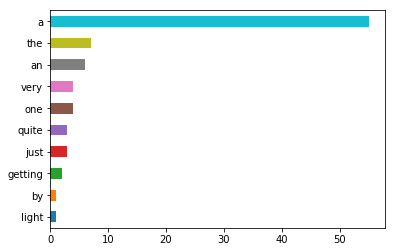

In [78]:
all_data_clean_b_test.name.value_counts().nlargest(10).sort_values().plot(kind = 'barh')

In [44]:
def name_check(name): 
    
    if re.search("^[a-z]",name):
        names_clean = ''
        return names_clean
    elif name == 'None':
        names_clean = ''
        return names_clean
    else:
        names_clean = name
        return names_clean
  

In [45]:
#Other method to perform without loop
#all_data_clean_b["name"].str.replace("(^[a-z]+$)","")

In [46]:
all_data_clean_b["name_clean"] = all_data_clean_b["name"].apply(name_check)

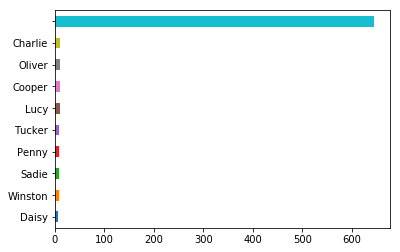

In [80]:
all_data_clean_b.name_clean.value_counts().nlargest(10).sort_values().plot(kind = 'barh')

In [47]:
all_data_clean_b

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,no_ratings,p1_cat,text_eq_ft,clean_URL,name_clean
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,...,0.085851,False,banana,0.076110,False,1,orange,1,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,...,0.090647,True,papillon,0.068957,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,...,0.078253,True,kelpie,0.031379,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,...,0.168086,True,spatula,0.040836,False,1,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,1,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,13,...,0.116317,True,Indian_elephant,0.076902,False,1,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,13,...,0.199287,True,ice_lolly,0.193548,False,1,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,13,...,0.178406,True,Pembroke,0.076507,True,1,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,13,...,0.193054,

In [48]:
all_data_clean_b = all_data_clean_b.drop(['name'], axis = 1)

In [49]:
all_data_clean_b.name_clean.value_counts()

              644
Charlie        11
Lucy           10
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Daisy           7
Toby            7
Lola            7
Bo              6
Jax             6
Koda            6
Stanley         6
Bella           6
Louis           5
Oscar           5
Chester         5
Rusty           5
Leo             5
Scout           5
Milo            5
Bailey          5
Dave            5
Buddy           5
Cassie          4
Reggie          4
Larry           4
             ... 
Billl           1
Halo            1
Bauer           1
Glacier         1
Geno            1
Venti           1
Bobbay          1
Iroh            1
Acro            1
Bayley          1
Jazz            1
Ebby            1
Carbon          1
Cuddles         1
Moreton         1
Birf            1
Goose           1
Tedrick         1
Bubba           1
Rolf            1
Brandonald      1
Willie          1
Buckley         1
Zeus            1
Claude    

In [50]:
#4) Some records have incorrect scoring due to multiple 'n/n's in the text 
#count the number of scores in the text
no_ratings = all_data_clean_b["full_text"].str.count("\d\/\d")

#count the presence of "and"s which could denote scoring of 2 animals
and_present = all_data_clean_b["full_text"].str.count\
("(\d+\/\d+|[A-Z][a-z]+)\s*(&amp;|and)\s*(\d+\/\d+|[A-Z][a-z]+)")

all_data_clean_c = all_data_clean_b
all_data_clean_c['no_ratings'] = no_ratings
all_data_clean_c['and_present'] = and_present

#retrieve records with more than 1 score but no obvious mention of 2 animals 
all_data_clean_c[(all_data_clean_c['no_ratings']>1)\
                 & (all_data_clean_c['and_present'] == 0)]\
                [["tweet_id","full_text","name_clean"]].head(20)
#10 records, 6 need changing can do manually
#740373189193256964, 722974582966214656, 716439118184652801,
# 695064344191721472, 682962037429899265, 666287406224695296


,tweet_id,full_text,name_clean
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,Bluebert
1229,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",
1284,690400367696297985,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,Eriq
1405,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,Darrel
1692,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,Eve
1732,672248013293752320,10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,
1981,667544320556335104,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",Kial
2052,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,


In [51]:
all_data_clean_c

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p2_dog,p3,p3_conf,p3_dog,no_ratings,p1_cat,text_eq_ft,clean_URL,name_clean,and_present
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,...,False,banana,0.076110,False,1,orange,1,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,...,True,papillon,0.068957,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,...,True,kelpie,0.031379,True,1,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,...,True,spatula,0.040836,False,1,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,...,True,German_short-haired_pointer,0.175219,True,1,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,13,...,True,Indian_elephant,0.076902,False,1,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,13,...,True,ice_lolly,0.193548,False,1,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,13,...,True,Pembroke,0.076507,True,1,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,13,...,True,Chesapeake_Bay_retriever,0.118184,True,1,terrier,1,https

In [52]:
second_rating_list = ['740373189193256964', '722974582966214656',\
                      '716439118184652801', '695064344191721472',\
                      '682962037429899265', '666287406224695296']
cleaning_rating = all_data_clean_c.copy()

cleaning_rating = cleaning_rating[cleaning_rating['tweet_id'].isin(second_rating_list)]
cleaning_rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p2_dog,p3,p3_conf,p3_dog,no_ratings,p1_cat,text_eq_ft,clean_URL,name_clean,and_present
876,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,9,...,True,Labrador_retriever,0.023785,True,2,retriever,1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,,0
967,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,4,...,True,Weimaraner,0.085297,True,2,Dane,1,https://twitter.com/dog_rates/status/722974582966214656/photo/1,,0
1001,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,50,...,True,Eskimo_dog,0.273419,True,2,husky,1,https://twitter.com/dog_rates/status/716439118184652801/photo/1,Bluebert,0
1229,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,4,...,False,ice_lolly,0.051774,False,2,belt,1,https://twitter.com/dog_rates/status/695064344191721472/video/1,,0
1405,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,7,...,True,loupe,0.153598,False,2,dingo,1,https://twitter.com/dog_rates/status/682962037429899265/photo/1,Darrel,0
2052,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,1,...,True,miniature_poodle,0.025581,True,2,dog,1,https://twitter.com/dog_rates/status/666287406224695296/photo/1,,0


In [53]:
#extract the second rating for those records identified as requiring cleaning
cleaning_rating['second_rating_pre'] = cleaning_rating.full_text.str.extract('(\d+\/\d+.*?\d+\/\d+)')
cleaning_rating['second_rating'] = cleaning_rating.second_rating_pre.str.extract('(\d+\/\d+$)')
cleaning_rating['second_rating_numerator'] = cleaning_rating.second_rating.str.extract('^(\d+)')
cleaning_rating['second_rating_denominator'] = cleaning_rating.second_rating.str.extract('(\d+$)')

new_rating = cleaning_rating[['tweet_id','second_rating_numerator','second_rating_denominator']]

#tweet_category['p1_cat'] = df.p1_4.combine_first(df.p1_3).combine_first(df.p1_2).combine_first(df.p1_1)

In [54]:
#Join whole dataset to fixed rating set and make new rating when second rating fields are populated
all_join_new_rating = pd.merge(all_data_clean_c,new_rating,  on=['tweet_id'], how = 'left')


all_join_new_rating['fixed_rating_numerator'] = all_join_new_rating.second_rating_numerator.combine_first(all_join_new_rating.rating_numerator)
all_join_new_rating['fixed_rating_denominator'] = all_join_new_rating.second_rating_denominator.combine_first(all_join_new_rating.rating_denominator)
#check substitution has worked
all_join_new_rating[all_join_new_rating['tweet_id'].isin(second_rating_list)]
all_data_clean_d = all_join_new_rating.drop(['second_rating_numerator','second_rating_denominator','rating_numerator','rating_denominator','no_ratings','and_present'], axis = 1)

all_data_clean_d

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,doggo,...,p2_dog,p3,p3_conf,p3_dog,p1_cat,text_eq_ft,clean_URL,name_clean,fixed_rating_numerator,fixed_rating_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,None,...,False,banana,0.076110,False,orange,1,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,None,...,True,papillon,0.068957,True,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13,10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,None,...,True,kelpie,0.031379,True,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12,10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,None,...,True,spatula,0.040836,False,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13,10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,None,...,True,German_short-haired_pointer,0.175219,True,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,12,10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,None,...,True,Indian_elephant,0.076902,False,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,13,10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,None,...,True,ice_lolly,0.193548,False,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,13,10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,None,...,True,Pembroke,0.076507,True,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,13,10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,None,...,True,Chesapea

In [55]:
all_data_clean_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 33 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweets                      1994 non-null int64
faves                         1994 non-null int64
full_text                     1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non

In [56]:
#5) Some records show more than 1 image but 1 url


tweet_multi_image = tweet_joinb[tweet_joinb['img_num']>1]
tweet_multi_image[['tweet_id','jpg_url']]
#take example to see if more than one row

all_data_clean_d[all_data_clean_d['tweet_id'] == 891327558926688256]
#Conclusion, image_num not a useful column. Could set all in the field to '1' but this just takes up space. May as well delete
all_data_clean_d= all_data_clean_d.drop(['img_num'], axis = 1)


In [57]:
#6) Some records with all probabilities of dog types 'FALSE'
#Remove these records 
all_data_clean_e = all_data_clean_d[(all_data_clean_d['p1_dog'] == 1) \
                              | (all_data_clean_d['p2_dog'] == 1) \
                              | (all_data_clean_d['p3_dog'] == 1)]
all_data_clean_e


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,doggo,...,p2_dog,p3,p3_conf,p3_dog,p1_cat,text_eq_ft,clean_URL,name_clean,fixed_rating_numerator,fixed_rating_denominator
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,None,...,True,papillon,0.068957,True,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13,10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,None,...,True,kelpie,0.031379,True,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12,10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,None,...,True,spatula,0.040836,False,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13,10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,None,...,True,German_short-haired_pointer,0.175219,True,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,12,10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,None,...,True,Indian_elephant,0.076902,False,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,13,10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,None,...,True,ice_lolly,0.193548,False,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,13,10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,None,...,True,Pembroke,0.076507,True,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,13,10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,None,...,True,Chesapeake_Bay_retriever,0.118184,True,terrier,1,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13,10
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophistic

In [58]:
all_data_clean_e.p1.value_counts()

#all_data_clean_b.name_clean.value_counts()

golden_retriever               139
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             54
chow                            41
Samoyed                         40
toy_poodle                      38
Pomeranian                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              22
Siberian_husky                  20
German_shepherd                 20
seat_belt                       20
Staffordshire_bullterrier       19
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
Shih-Tzu                        17
beagle                          17
Rottweiler                      17
Cardigan                        17
Lakeland_terrier                16
Italian_greyhound               16
kuvasz                          16
West_Highland_white_

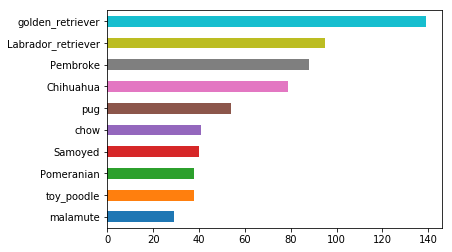

In [76]:
all_data_clean_e.p1.value_counts().nlargest(10).sort_values().plot(kind = 'barh')

In [59]:
#7) Categorisation of dogs too disparate
#We can make broader categories to fit dogs into based on p1 or if that's false p2, below code jsut for example
all_data_clean_f = all_data_clean_e.copy()
df = pd.DataFrame(all_data_clean_e.p1.str.split('_',3).tolist(),columns = ['p1_1','p1_2','p1_3','p1_4'])
all_data_clean_f['broad_cat'] = df.p1_4.combine_first(df.p1_3).combine_first(df.p1_2).combine_first(df.p1_1)
all_data_clean_f.broad_cat.value_counts()


retriever       235
terrier          91
Pembroke         75
Chihuahua        63
spaniel          50
poodle           46
pug              45
dog              43
chow             38
Samoyed          35
Pomeranian       34
malamute         26
sheepdog         25
bulldog          24
collie           21
pinscher         19
husky            18
belt             17
bullterrier      17
shepherd         17
Rottweiler       16
Cardigan         16
kuvasz           15
Shih-Tzu         15
setter           13
greyhound        13
beagle           12
basset           11
Pekinese         11
ball             10
               ... 
machine           1
griffon           1
boa               1
hyena             1
hotdog            1
carton            1
maillot           1
upright           1
mortarboard       1
curtain           1
bathtub           1
weasel            1
wall              1
Loafer            1
handkerchief      1
sign              1
hare              1
refrigerator      1
bonnet            1


In [60]:
#8) Several columns are FLOAT
#all_data_clean_f.info()
all_data_clean_f.select_dtypes('float')
#all_data_clean_f.in_reply_to_status_id.value_counts()


,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,p1_conf,p2_conf,p3_conf
1,NaN,NaN,NaN,NaN,0.323581,0.090647,0.068957
2,NaN,NaN,NaN,NaN,0.716012,0.078253,0.031379
3,NaN,NaN,NaN,NaN,0.170278,0.168086,0.040836
4,NaN,NaN,NaN,NaN,0.555712,0.225770,0.175219
5,NaN,NaN,NaN,NaN,0.425595,0.116317,0.076902
6,NaN,NaN,NaN,NaN,0.341703,0.199287,0.193548
7,NaN,NaN,NaN,NaN,0.566142,0.178406,0.076507
8,NaN,NaN,NaN,NaN,0.487574,0.193054,0.118184
9,NaN,NaN,NaN,NaN,0.511319,0.451038,0.029248
10,NaN,NaN,NaN,NaN,0.957979,0.013884,0.008167


In [61]:
#Convert columns with content to object fields, decimal fields should stay as floats
all_data_clean_g = all_data_clean_f.astype({'in_reply_to_status_id': 'object','in_reply_to_user_id': 'object'})

#retweeted columns were only brought in if null and so can be dropped
all_data_clean_h = all_data_clean_g.drop(['retweeted_status_id','retweeted_status_user_id'], axis = 1)

all_data_clean_h

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,doggo,floofer,pupper,...,p3,p3_conf,p3_dog,p1_cat,text_eq_ft,clean_URL,name_clean,fixed_rating_numerator,fixed_rating_denominator,broad_cat
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,None,None,None,...,papillon,0.068957,True,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13,10,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,None,None,None,...,kelpie,0.031379,True,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12,10,towel
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,None,None,None,...,spatula,0.040836,False,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13,10,basset
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,None,None,None,...,German_short-haired_pointer,0.175219,True,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,12,10,retriever
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,None,None,None,...,Indian_elephant,0.076902,False,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,13,10,Appenzeller
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,None,None,None,...,ice_lolly,0.193548,False,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,13,10,Pomeranian
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,None,None,None,...,Pembroke,0.076507,True,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,13,10,terrier
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,None,None,None,...,Chesapeake_Bay_retriever,0.118184,True,terrier,1,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13,10,Pembroke
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so 

### Fixing Tidiness Issues 


In [62]:
#1) tweet_json and twitter_archive shouldn't be separate tables as describing same object -- doesn't require code
#2) Full_text and text, duplicate info

all_data_clean_i = all_data_clean_h.drop(['text'],axis = 1)
all_data_clean_i

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_timestamp,doggo,floofer,pupper,puppo,...,p3,p3_conf,p3_dog,p1_cat,text_eq_ft,clean_URL,name_clean,fixed_rating_numerator,fixed_rating_denominator,broad_cat
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,papillon,0.068957,True,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13,10,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,kelpie,0.031379,True,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12,10,towel
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,spatula,0.040836,False,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13,10,basset
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,German_short-haired_pointer,0.175219,True,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,12,10,retriever
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,Indian_elephant,0.076902,False,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,13,10,Appenzeller
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,ice_lolly,0.193548,False,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,13,10,Pomeranian
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,Pembroke,0.076507,True,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,13,10,terrier
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,Chesapeake_Bay_retriever,0.118184,True,terrier,1,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13,10,Pembroke
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,doggo,None,None,None,...,Chihuahua,0.029248,True,Pembroke,1,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14,10,Samoyed
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,None,None,None,...,chow,0.008167,True,Samoyed,1,https://twitter.com/dog_rates/status/890006608113172480/photo/1,Koda,13,10,bulldog


In [63]:
#3) doggo ,floofer, pupper and puppo are objects when could be boolean to save space

def bool_replace(col): 
    
    if col == "None":
        bool_ver = 0
        return bool_ver

    else:
        bool_ver = 1
        return bool_ver

all_data_clean_i["floofer_bool"] = all_data_clean_i["floofer"].apply(bool_replace)
all_data_clean_i["doggo_bool"] = all_data_clean_i["doggo"].apply(bool_replace)
all_data_clean_i["pupper_bool"] = all_data_clean_i["pupper"].apply(bool_replace)
#all_data_clean_b["name_clean"] = all_data_clean_b["name"].apply(name_check)
all_data_final = all_data_clean_i.drop(['floofer','doggo','pupper'],axis = 1)

In [64]:
all_data_final

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_timestamp,puppo,retweets,faves,full_text,...,p1_cat,text_eq_ft,clean_URL,name_clean,fixed_rating_numerator,fixed_rating_denominator,broad_cat,floofer_bool,doggo_bool,pupper_bool
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",...,Chihuahua,1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13,10,Chihuahua,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,...,Chihuahua,1,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12,10,towel,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,...,towel,1,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13,10,basset,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",...,basset,1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,12,10,retriever,0,0,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,3261,20562,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,...,retriever,1,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,13,10,Appenzeller,0,0,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,2158,12041,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,...,Appenzeller,1,https://gofundme.com/ydvmve-surgery-for-jax,Jax,13,10,Pomeranian,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,16716,56848,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,...,Pomeranian,1,https://twitter.com/dog_rates/status/890729181411237888/photo/1,,13,10,terrier,0,0,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,4429,28226,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,...,terrier,1,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13,10,Pembroke,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,7711,32467,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,...,Pembroke,1,https://twitter.com/dog_rates/status/890240255349198849/photo/

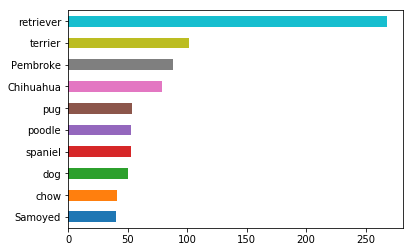

In [75]:
import matplotlib.pyplot as  plt


all_data_final.p1_cat.value_counts().nlargest(10).sort_values().plot(kind = 'barh')

In [73]:
all_data_final.broad_cat.value_counts().nlargest(10)

retriever    235
terrier       91
Pembroke      75
Chihuahua     63
spaniel       50
poodle        46
pug           45
dog           43
chow          38
Samoyed       35
Name: broad_cat, dtype: int64

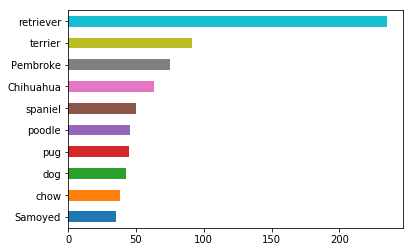

In [74]:
all_data_final.broad_cat.value_counts().nlargest(10).sort_values().plot(kind = 'barh')